In [11]:
# Autoreload extension
#%load_ext autoreload    
#%autoreload 2

# Include local library paths
import sys, os
#cwd = os.getcwd()
cwd = '../../'
lib = 'lifecycles/'
pth = os.path.join(cwd, lib)
sys.path.append(pth)



In [12]:
import lifecycles as lcs
import tnetwork as tn
from tnetwork import DCD

In [13]:
def dynamic_cluster_to_snaps(dyn_coms):
    """
    Convert a dynamic cluster to a list of snapshots
    :param dyn_coms: a dynamic community object
    :return: a list of snapshots
    """
    snaps = []
    for t in dyn_coms.snapshots.keys():
        snap = dyn_coms.snapshots[t]
        snaps.append(snap.values())
    return snaps

In [34]:
#tg = tn.graph_socioPatterns2012(format=tn.DynGraphSN)
tg = tn.graph_socioPatterns_Primary_School(format=tn.DynGraphSN)
#tg = tn.graph_socioPatterns_Hospital(format=tn.DynGraphSN)

graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_sn.DynGraphSN'>


In [35]:
tg_day = tg.aggregate_time_period(period="day")

In [36]:
def compute_life_cycles(tg):
    dyn_coms = DCD.iterative_match(tg)
    snapsDay = dynamic_cluster_to_snaps(dyn_coms)
    lc = lcs.LifeCycle(int)
    lc.add_partitions_from(snapsDay)
    return lc

In [37]:
lc = compute_life_cycles(tg_day)

  0% (0 of 2) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 50% (1 of 2) |#############             | Elapsed Time: 0:00:00 ETA:   0:00:00

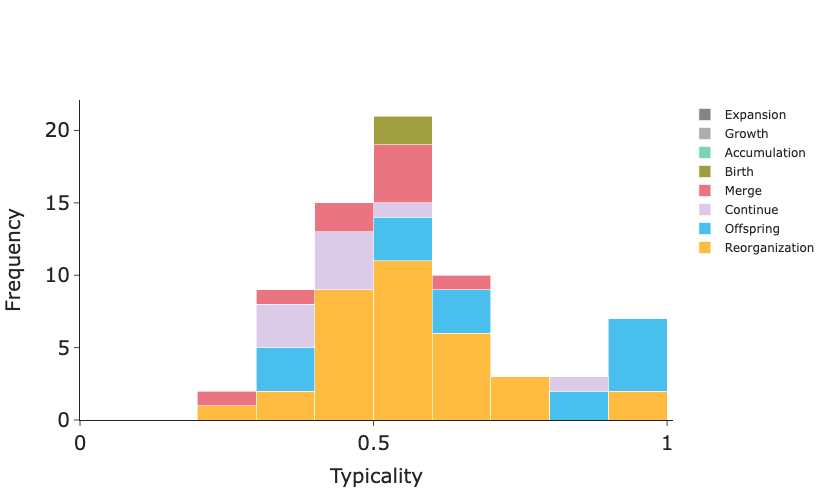

In [32]:
import numpy as np
fig = lcs.typicality_distribution(lc,direction="-",width=500, showlegend=True)

fig.update_xaxes(range=[0, 1.01], tickvals=np.arange(0, 1.01, 0.5))
fig.update_layout(
    xaxis_title="Typicality", 
    xaxis_title_font_size=20,
    yaxis_title="Frequency",
    yaxis_title_font_size=20,
    xaxis=dict(tickfont=dict(size=20)),  # Change the size as needed
    yaxis=dict(tickfont=dict(size=20))   # Change the size as needed
)
#fig.update_yaxes(range=[0.1,None], tickvals=np.arange(0, 20, 5))

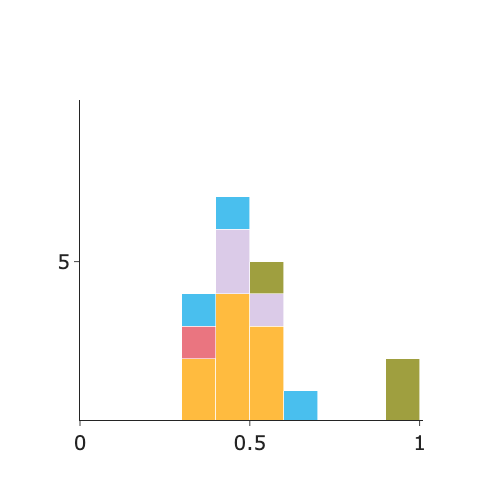

In [18]:
import numpy as np
fig = lcs.typicality_distribution(lc,direction="-",width=500, showlegend=False)

fig.update_xaxes(range=[0, 1.01], tickvals=np.arange(0, 1.01, 0.5))
fig.update_layout(
    xaxis=dict(tickfont=dict(size=20)),  # Change the size as needed
    yaxis=dict(tickfont=dict(size=20))   # Change the size as needed
)
fig.update_yaxes(range=[0.1,10], tickvals=np.arange(0, 10, 5))

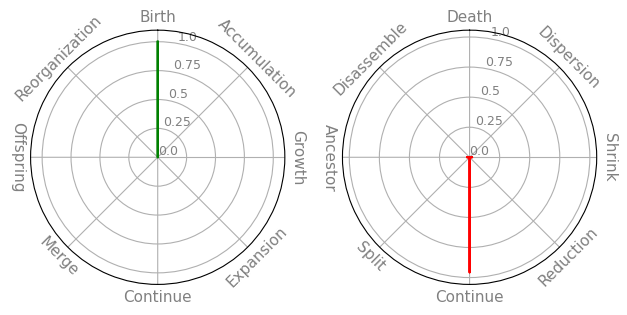

In [45]:
lcs.plot_event_radars(lc, '0')